In [2]:
import dataset
import numpy as np
import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")


In [2]:
dataset.UTKDatasetNew("./UTKFace_inthewild/part2_new_croped").__len__()

10484

In [27]:
age_list = []
gender_list = []

dataset_list = dataset.UTKDatasetNew("./UTKFace_inthewild/croped")

for i in range(dataset_list.__len__()):
    _ ,age, gen = dataset_list.__getitem__(i)

    age_list.append(age.item())
    gender_list.append(gen.item())



data = {'age':age_list,
       'gender':gender_list}

df = pd.DataFrame(data)

In [29]:
df = pd.read_csv('./IMDB-clean dataset/imdb_part' + '/IMDB_dataset.csv')

X = df.drop(columns=['age'])  # Adjust features as needed
y = df['age']


df, _= train_test_split(df, test_size=0.5, random_state=69)



df_train, temp = train_test_split(df, test_size=0.3, random_state=42)# 
df_test, df_valid = train_test_split(temp, test_size=0.5, random_state=42)#  stratify=temp.age,

In [1]:
from imblearn.over_sampling import RandomOverSampler

In [9]:

# Load your dataset
df = pd.read_csv('./IMDB-clean dataset/imdb_part/IMDB_dataset.csv')

# Specify the features (X) and target (y)
X = df.drop(columns=['age'])  # Adjust features as needed
y = df['age']

# Oversample the minority classes to ensure each class has at least two members
oversampler = RandomOverSampler(sampling_strategy='all')
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Perform a stratified train-test split on the resampled data
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.5, random_state=42)#, stratify=y_resampled
X_test, X_valid, y_test, y_valid = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)#, stratify=y_temp


In [10]:
df_train = pd.concat([X_train, y_train], axis=1)
df_valid = pd.concat([X_valid, y_valid], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)


In [12]:
df = pd.read_csv('./IMDB-clean dataset/imdb_part/IMDB_dataset.csv')

In [24]:
train_test_split(df, test_size=0.5, stratify=df['age'].values , random_state=42)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

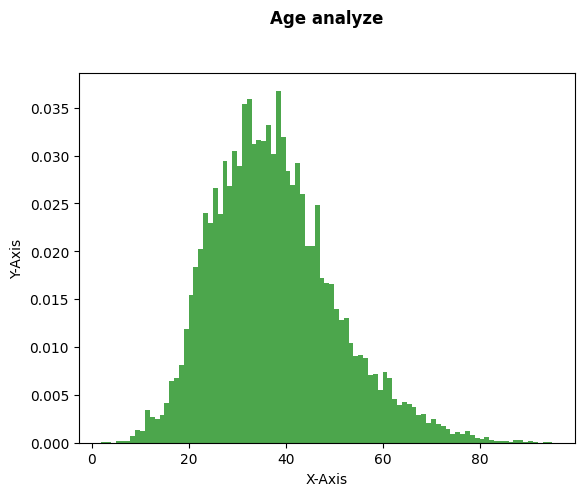

In [13]:
plt.hist(df.age, len(df.age.unique()),density = 1,color ='green',alpha = 0.7)

# plt.hist(df_train.age, len(df_train.age.unique()),density = 1,color ='green',alpha = 0.7)
# plt.hist(df_test.age, len(df_test.age.unique()),density = 1,color ='red',alpha = 0.7)
# plt.hist(df_valid.age, len(df_valid.age.unique()),density = 1,color ='blue',alpha = 0.7)

plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
 
plt.title('Age analyze\n\n',
          fontweight = "bold")
 
plt.show()

In [67]:
dataloader = dataset.UTKFace()

In [69]:
len(next(iter(dataloader(batch_size=64))))

3

Show image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 128, 128])


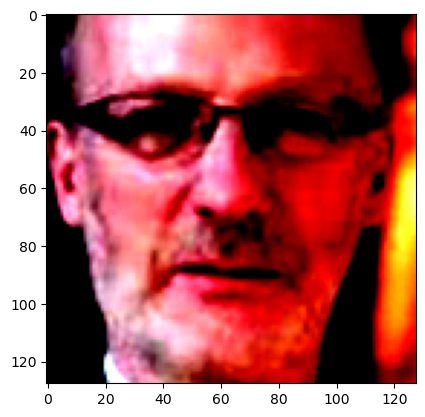

In [44]:
data = next(iter(dataloader(batch_size=64)))
print(data[0][0].shape)
plt.imshow(data[0][0].permute(1,-1,0))

In [16]:
train_path = './UTKFace/UTKFace'
test_path = './UTKFace/crop_part1'

In [10]:
dataset.UTKDataset(train_path).__len__()

23659

tensor(0)


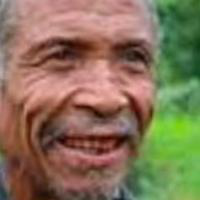

In [47]:
img, age, gen = dataset.UTKDataset(train_path).__getitem__(22222)
print(gen)
img

In [22]:
path_list = []
age_list = []
gender_list = []
ethnicity_list = []

In [23]:
file_path_list = glob.glob(train_path+'/*.jpg')

for f in file_path_list:
    name_path = f.split('\\')[-1].split('_')
    
    if len(name_path) < 4 :
        print(f.split('\\')[-1])
    else:
        age = int(name_path[0])
        gen = int(name_path[1])
        eth = int(name_path[2])
            
        path_list.append(f.split('\\')[-1])
        age_list.append(age)
        gender_list.append(gen)
        ethnicity_list.append(eth)

39_1_20170116174525125.jpg.chip.jpg
61_1_20170109142408075.jpg.chip.jpg
61_1_20170109150557335.jpg.chip.jpg


In [28]:
data = {'name_path':path_list,
       'age':age_list,
       'gender':gender_list,  # 1 = female    0 = male
       'ethnicity':ethnicity_list}

df = pd.DataFrame(data)

{'bodies': [<matplotlib.collections.PolyCollection at 0x19906cf7640>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x19906ce48e0>,
 'cmins': <matplotlib.collections.LineCollection at 0x19906d20070>,
 'cbars': <matplotlib.collections.LineCollection at 0x19906d20400>}

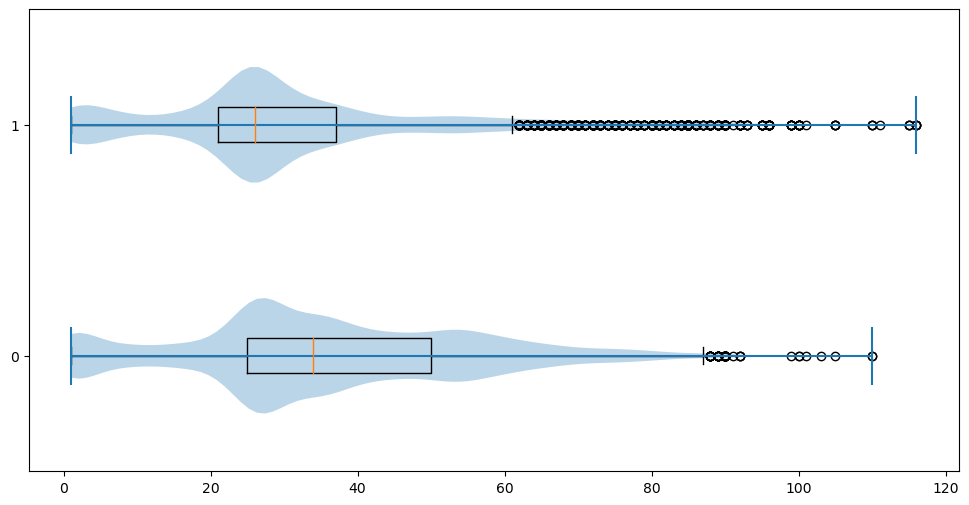

In [64]:
plt.figure(figsize=(12,6))
plt.boxplot([df.age[df.gender ==cat]for cat in df.gender.unique()], vert=False, labels=df.gender.unique())
plt.violinplot([df.age[df.gender ==cat]for cat in df.gender.unique()], vert=False)